In [1]:
import tensorflow as tf
import pandas as pd
import numpy as np
import cv2
import sklearn
import matplotlib.pyplot as plt
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor


### Introduction to Regression with Neural Network in Tensorflow

There are many defenitions for a regression problem but in our case, we're going to simplify it: predicting a numerical variable based on some other combination of variables, even shorter...predicting a number

## Creating data to view and fit

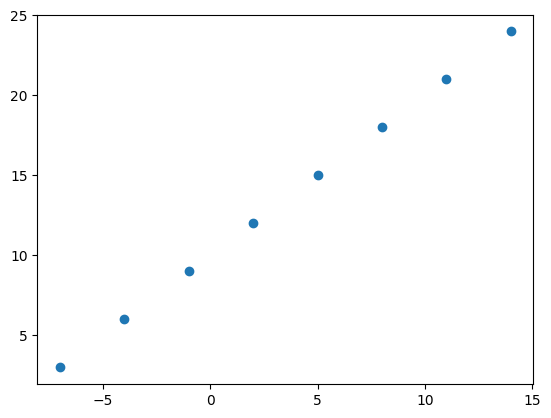

In [3]:
#Create features 
x=np.array([-7.0, -4.0, -1.0, 2.0, 5.0, 8.0, 11.0, 14.0])

# Create labels
y=np.array([3.0, 6.0, 9.0, 12.0, 15.0, 18.0, 21.0, 24.0])

# Visualize it

plt.scatter(x,y)


## input and output shapes

In [4]:
# Create a demo tensor for our housing price prediction 

house_info=tf.constant(["bedroom","bathroom","garage"])
housse_price=tf.constant([939700])
house_info,housse_price

(<tf.Tensor: shape=(3,), dtype=string, numpy=array([b'bedroom', b'bathroom', b'garage'], dtype=object)>,
 <tf.Tensor: shape=(1,), dtype=int32, numpy=array([939700])>)

In [5]:
x[0],y[0]

(-7.0, 3.0)

In [6]:
x[1],y[1]

(-4.0, 6.0)

In [7]:
input_shape=x.shape
output_shape=y.shape
input_shape,output_shape

((8,), (8,))

In [8]:
# turn our numpy arrays to tensors

x=tf.cast(tf.constant(x), dtype=tf.float32)
y=tf.cast(tf.constant(y),dtype=tf.float32)

x,y

(<tf.Tensor: shape=(8,), dtype=float32, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.], dtype=float32)>,
 <tf.Tensor: shape=(8,), dtype=float32, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.], dtype=float32)>)

In [9]:
input_shape=x[0].shape
output_shape=y[0].shape
input_shape,output_shape

(TensorShape([]), TensorShape([]))

## Steps in modelling with tensorflow

1. **Creating a model**- define the input and output layersm as well as the hidden layers of a deep learning model.

2. **Compiling a model**

3. **Fitting a model**- letting the model try to find patterns between x&y ( features and labels)

In [13]:
# set random seed
tf.random.set_seed(42)

# 1. Create a model using Sequential API

model=tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

# 2. Compile the model

model.compile(loss=tf.keras.losses.mae,# mae = Mean absolute error
    optimizer=tf.keras.optimizers.SGD(),
    metrics=["mae"]
        ), 


# 3. Fit the model

model.fit(tf.expand_dims(x,axis=-1),y,epochs=100)

Epoch 1/100
1/1 [==============================] - 0s 408ms/step - loss: 11.5048 - mae: 11.5048
Epoch 2/100
1/1 [==============================] - 0s 5ms/step - loss: 11.3723 - mae: 11.3723
Epoch 3/100
1/1 [==============================] - 0s 5ms/step - loss: 11.2398 - mae: 11.2398
Epoch 4/100
1/1 [==============================] - 0s 7ms/step - loss: 11.1073 - mae: 11.1073
Epoch 5/100
1/1 [==============================] - 0s 9ms/step - loss: 10.9748 - mae: 10.9748
Epoch 6/100
1/1 [==============================] - 0s 7ms/step - loss: 10.8423 - mae: 10.8423
Epoch 7/100
1/1 [==============================] - 0s 9ms/step - loss: 10.7098 - mae: 10.7098
Epoch 8/100
1/1 [==============================] - 0s 9ms/step - loss: 10.5773 - mae: 10.5773
Epoch 9/100
1/1 [==============================] - 0s 16ms/step - loss: 10.4448 - mae: 10.4448
Epoch 10/100
1/1 [==============================] - 0s 12ms/step - loss: 10.3123 - mae: 10.3123
Epoch 11/100
1/1 [==============================] - 0s 

In [11]:
# # Check out x and y

# y_pred = model.predict([17.0])

# Improving the model

We can improve our model, by altering the steps we took to create model.

In [39]:
#rebuild model

# set random seed
tf.random.set_seed(42)

# 1. Create a model using Sequential API

model=tf.keras.Sequential([
   
    tf.keras.layers.Dense(50, activation=None),
    
    
    tf.keras.layers.Dense(1)
])

# 2. Compile the model

model.compile(loss=tf.keras.losses.mae,# mae = Mean absolute error
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
    metrics=['accuracy']
        ), 


# 3. Fit the model

model.fit(tf.expand_dims(x,axis=-1),y,epochs=100)

Epoch 1/100
1/1 [==============================] - 1s 534ms/step - loss: 13.1820 - accuracy: 0.0000e+00
Epoch 2/100
1/1 [==============================] - 0s 6ms/step - loss: 12.5071 - accuracy: 0.0000e+00
Epoch 3/100
1/1 [==============================] - 0s 6ms/step - loss: 11.8279 - accuracy: 0.0000e+00
Epoch 4/100
1/1 [==============================] - 0s 8ms/step - loss: 11.1425 - accuracy: 0.0000e+00
Epoch 5/100
1/1 [==============================] - 0s 24ms/step - loss: 10.4484 - accuracy: 0.0000e+00
Epoch 6/100
1/1 [==============================] - 0s 11ms/step - loss: 9.7426 - accuracy: 0.0000e+00
Epoch 7/100
1/1 [==============================] - 0s 9ms/step - loss: 9.0218 - accuracy: 0.0000e+00
Epoch 8/100
1/1 [==============================] - 0s 20ms/step - loss: 8.2826 - accuracy: 0.0000e+00
Epoch 9/100
1/1 [==============================] - 0s 8ms/step - loss: 7.5221 - accuracy: 0.0000e+00
Epoch 10/100
1/1 [==============================] - 0s 13ms/step - loss: 6.7841 -

In [40]:
x,y

(<tf.Tensor: shape=(8,), dtype=float32, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.], dtype=float32)>,
 <tf.Tensor: shape=(8,), dtype=float32, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.], dtype=float32)>)

In [45]:
model.predict([100])

array([[110.56458]], dtype=float32)

## Evaluating a model

In practice, a typical workflow you'll go through when building neural network is:

```
Build a model -> fit it  -> evaluate it -> tweak a model -> fit it -> evaluate -> tweak a model -> fit it -> evaluate it...

```

When it comes to evaluating... there are 3 words you should memorize 

>"Visualize, Visualize, Visualize"

In [3]:
# Make a bigger dataset

X=tf.range(-100,100,4)
X

<tf.Tensor: shape=(50,), dtype=int32, numpy=
array([-100,  -96,  -92,  -88,  -84,  -80,  -76,  -72,  -68,  -64,  -60,
        -56,  -52,  -48,  -44,  -40,  -36,  -32,  -28,  -24,  -20,  -16,
        -12,   -8,   -4,    0,    4,    8,   12,   16,   20,   24,   28,
         32,   36,   40,   44,   48,   52,   56,   60,   64,   68,   72,
         76,   80,   84,   88,   92,   96])>

In [4]:
# Make the labels for the dataset

y=X+10
y

<tf.Tensor: shape=(50,), dtype=int32, numpy=
array([-90, -86, -82, -78, -74, -70, -66, -62, -58, -54, -50, -46, -42,
       -38, -34, -30, -26, -22, -18, -14, -10,  -6,  -2,   2,   6,  10,
        14,  18,  22,  26,  30,  34,  38,  42,  46,  50,  54,  58,  62,
        66,  70,  74,  78,  82,  86,  90,  94,  98, 102, 106])>

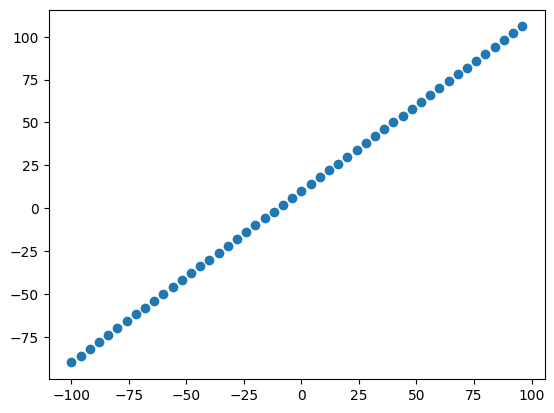

In [5]:
# Visualize the data
plt.scatter(X,y)


### The 3 sets...

* Training set - the model learns from this data, which is typacilly 70-80% of the total data you have available.
* Validation set - the model gets tuned on this data, which is typacilly 10-15% of the data avilable.
* Test set - the model gets evaluated on this data to test what is has learned, this set is typically 10-15% of the total data available.

In [17]:
# Splitting dataset 

X_train= X[:40]
X_test=X[40:]
y_train=y[:40]
y_test=y[40:]

len(X_train),len(X_test),len(y_train),len(y_test)

(40, 10, 40, 10)

### visualizing the data

Now we've got our data in training and test sets... let's visualize the data

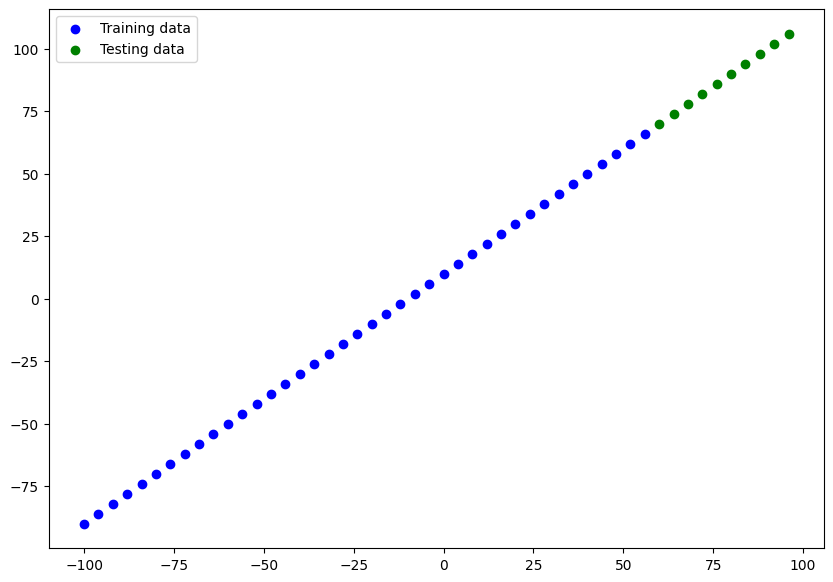

In [18]:
plt.figure(figsize=(10,7))
# plot training in blue
plt.scatter(X_train,y_train,c="b",label="Training data")
# plot test data in green
plt.scatter(X_test,y_test,c="g",label="Testing data")
# Show a legend
plt.legend()


In [19]:
# Let's have a look at how to build a neural network for our data

# 1. Create a  model
model=tf.keras.Sequential([    
    tf.keras.layers.Dense(1)
])

# 2. Compile the model

model.compile(loss=tf.keras.losses.mae,  # mae = Mean absolute error
    optimizer=tf.keras.optimizers.SGD(),
    metrics=["mae"]
        ), 


(None,)

### Visualizing the model

In [21]:
model.summary()

ValueError: This model has not yet been built. Build the model first by calling `build()` or by calling the model on a batch of data.

In [50]:
# Let's Create a model which builds atuomatically by defining the input_shape argument

tf.random.set_seed(42)

# Create a model (same as above)

model=tf.keras.Sequential([    
    tf.keras.layers.Dense(15,input_shape=[1],name="input_layer"),
    tf.keras.layers.Dense(1,name="output_layer")
],name="model_1")

# 2. Compile the model

model.compile(loss=tf.keras.losses.mae,  # mae = Mean absolute error
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.1),
    metrics=["mae"]
        ), 

(None,)

In [51]:
model.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (Dense)         (None, 15)                30        
                                                                 
 output_layer (Dense)        (None, 1)                 16        
                                                                 
Total params: 46
Trainable params: 46
Non-trainable params: 0
_________________________________________________________________


* Total params - total number of parameters in the model.
* Trainable parameters - these are the parameters (patterns) the model update as it trains
* Non-trainable params - these parameters aren't updated during training(this is typical when you bring in already learn patterns or parameters from other models during **transfer learning** ).

In [52]:
# Let's fit our model to the training
model.fit(X_train,y_train,epochs=100)

Epoch 1/100
2/2 [==============================] - 0s 5ms/step - loss: 17.0150 - mae: 17.0150
Epoch 2/100
2/2 [==============================] - 0s 8ms/step - loss: 17.6778 - mae: 17.6778
Epoch 3/100
2/2 [==============================] - 0s 10ms/step - loss: 17.1874 - mae: 17.1874
Epoch 4/100
2/2 [==============================] - 0s 10ms/step - loss: 17.9152 - mae: 17.9152
Epoch 5/100
2/2 [==============================] - 0s 9ms/step - loss: 7.1724 - mae: 7.1724
Epoch 6/100
2/2 [==============================] - 0s 7ms/step - loss: 12.4098 - mae: 12.4098
Epoch 7/100
2/2 [==============================] - 0s 33ms/step - loss: 7.5898 - mae: 7.5898
Epoch 8/100
2/2 [==============================] - 0s 11ms/step - loss: 9.0963 - mae: 9.0963
Epoch 9/100
2/2 [==============================] - 0s 13ms/step - loss: 5.8359 - mae: 5.8359
Epoch 10/100
2/2 [==============================] - 0s 11ms/step - loss: 7.5949 - mae: 7.5949
Epoch 11/100
2/2 [==============================] - 0s 15ms/ste

In [47]:
from tensorflow.keras.utils import plot_model

plot_model(model=model,show_shapes=True)

You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model/model_to_dot to work.


## Visualizing our models predictions

To visualize predictions, it's a good idea to plot them against the ground truth labels

In [53]:
y_pred=model.predict(X_test)
y_pred

array([[ 70.27891 ],
       [ 74.284096],
       [ 78.28929 ],
       [ 82.29447 ],
       [ 86.299675],
       [ 90.30487 ],
       [ 94.31005 ],
       [ 98.315254],
       [102.32044 ],
       [106.32564 ]], dtype=float32)

In [43]:
y_test

<tf.Tensor: shape=(10,), dtype=int32, numpy=array([ 70,  74,  78,  82,  86,  90,  94,  98, 102, 106])>

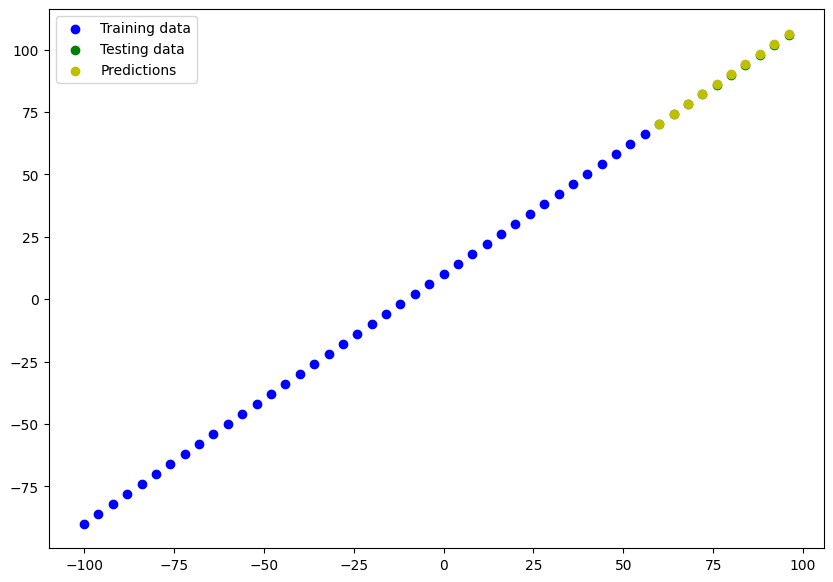

In [54]:
# Lets's create a plotting function 
def plot_predictions(train_data=X_train,
                     train_labels=y_train,
                     test_data=X_test,
                     test_labels=y_test,
                     predictions=y_pred):
    plt.figure(figsize=(10,7))
    # Plot training data in blue
    plt.scatter(train_data,train_labels,c="b",label="Training data")
    # Plot testing data in green
    plt.scatter(test_data,test_labels,c="g",label="Testing data")
    # Plot model's prediction in yellow
    plt.scatter(test_data,predictions,c="y",label="Predictions")
    # Show legend
    plt.legend()
    
    
plot_predictions(train_data=X_train,train_labels=y_train,test_data=X_test,test_labels=y_test,predictions=y_pred)    

### Evaluating our model's predictions with regression evaluation metrics

In [55]:
# Evaluate the model on the test

model.evaluate(X_test,y_test)

1/1 [==============================] - 0s 164ms/step - loss: 0.3023 - mae: 0.3023


[0.30226975679397583, 0.30226975679397583]

In [58]:
# Calculate the mean absolute error 

mae=tf.metrics.MAE(y_test,tf.squeeze(y_pred))
mae

<tf.Tensor: shape=(), dtype=float32, numpy=0.30226976>

In [59]:
# Calculate mean square error 

mse= tf.metrics.MSE(y_test,tf.squeeze(y_pred))
mse

<tf.Tensor: shape=(), dtype=float32, numpy=0.09158943>

In [63]:
def mae(y_test,y_pred):
    return tf.metrics.MAE(y_test,tf.squeeze(y_pred))

def mse(y_test,y_pred):
    return tf.metrics.MSE(y_test,tf.squeeze(y_pred))

In [65]:
mae=mae(y_test=y_test,y_pred=y_pred)
mse=mse(y_test=y_test,y_pred=y_pred)
mae,mse

(<tf.Tensor: shape=(), dtype=float32, numpy=0.30226976>,
 <tf.Tensor: shape=(), dtype=float32, numpy=0.09158943>)

### Comparing the results of our experiments

In [ ]:
# Let's compare our model's results with panda